# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: 3 de Octubre, 2021 23:59
</div>

In [1]:
%pylab inline
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from mpl_toolkits import mplot3d

from ipywidgets import interact, fixed, widgets 

Populating the interactive namespace from numpy and matplotlib


## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

In [2]:
x,y,m,i,j = sym.symbols('x,y,m,i,j')
b=sym.symbols('beta')
b_0=sym.Indexed(b,0)
b_1=sym.Indexed(b,1)
J= sym.Function('J')
S=sym.Function('S')
S=sym.Sum((y**(i)-b_0-b_1*x**(i))**2,(i,1,m))
J=sym.Eq(J(b_0,b_1),(1/(2*m))*(S))
J

Eq(J(beta[0], beta[1]), Sum((-x**i*beta[1] + y**i - beta[0])**2, (i, 1, m))/(2*m))

Para este caso particular las derivadas nos deben de dar:

$$
\frac{\partial}{\partial \beta_0} \textbf{J}(\beta_0,\beta_1) = \frac{1}{m}\sum_{i=1}^{m}\left(\beta_0+\beta_1(x^{(i)})-y^{(i)}\right)
$$

$$
\frac{\partial}{\partial \beta_1} \textbf{J}(\beta_0,\beta_1) = \frac{1}{m}\sum_{i=1}^{m}\left(\beta_0+\beta_1(x^{(i)})-y^{(i)}\right)*x^{(i)}
$$


In [3]:
sym.diff(J.rhs,b_0) 

Sum(2*x**i*beta[1] - 2*y**i + 2*beta[0], (i, 1, m))/(2*m)

In [4]:
sym.diff(J.rhs,b_1)

Sum(-2*x**i*(-x**i*beta[1] + y**i - beta[0]), (i, 1, m))/(2*m)

## Problema 2

In [5]:

class RegresionLineal:
    def __init__(self, alpha=0.3, max_iters=10000, tols=0.001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia, que tanto nos estamos acercando
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        self.i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while self.i < self.max_iters:     
            # Actualizamos beta (con la formula de betaj)
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            #En el if estamos checando la convergencia
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), self.i ))
                self.breaking_iteration = self.i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            self.i += 1
    
    def hipotesis(self, x):
        #Producto punto
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        #La diferencia
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m


Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

In [6]:
X= np.loadtxt('data/edad.dat')
Y= np.loadtxt('data/altura.dat')

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

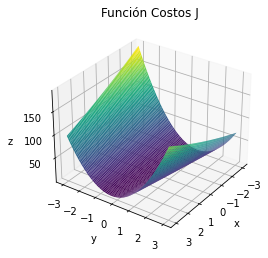

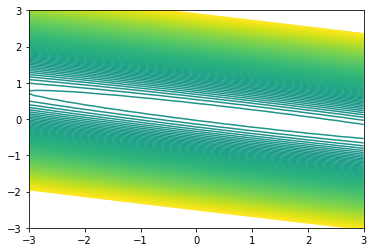

In [7]:
def J(b0, b1):
    c = 0
    for i in range(len(Y)):
        c+= (Y[i]-b0-b1*X[i])**2/(2*len(Y))
    return c

x = np.linspace(-3, 3, 70)
y = np.linspace(-3, 3, 70)

X1, Y1 = np.meshgrid(x, y)
Z = J(X1, Y1)
# graficamos la funcion de costos

ax = plt.axes(projection='3d')
ax.plot_surface(X1, Y1, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('Función Costos J')
ax.view_init(30, 35)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


#Grafica de contorno
cont = plt.figure()
plt.contour(X1,Y1,Z, levels= np.arange(-100,100,.8), cmap="viridis")

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.


La función convergió con beta: [0.69567582 0.07379435] en la iteración 8231


Text(0.5, 0, 'z')

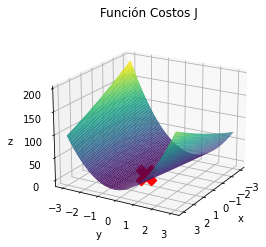

In [8]:
# puntos b_0 y b_1 
r = RegresionLineal(alpha=0.003, max_iters=10000, tols=0.0000001)
r.gradientDescent(X,Y)
# punto donde esta J(b_0,b_1)
p= [r.historia['beta'][r.breaking_iteration-1][0], r.historia['beta'][r.breaking_iteration-1][1], r.historia["costo"][r.breaking_iteration-1]]
#Ponemos el punto en la grafica
ax = plt.axes(projection='3d')
ax.plot_surface(X1, Y1, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.scatter(p[0], p[1], p[2], linewidths=1.5, c="r", marker="X", s=400)
ax.set_title('Función Costos J')
ax.view_init(20, 30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.



interactive(children=(IntSlider(value=4111, description='iteracion', max=8230, min=1, step=10), Output()), _do…

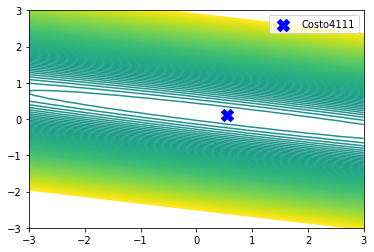

In [9]:
def CostoIteraciones(iteracion):
    cont = plt.figure()
    plt.contour(X1,Y1,Z, levels= np.arange(-100,100,.8), cmap="viridis")
    plt.scatter(r.historia['beta'][iteracion-1][0], r.historia['beta'][iteracion-1][1],c="b",s=150, marker="X", label=str("Costo"+str(iteracion)))
    plt.legend(loc="best")

interact(CostoIteraciones, iteracion=(1,r.breaking_iteration-1, 10));

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

interactive(children=(FloatSlider(value=0.0016, description='a', max=0.003, min=0.0003, step=0.0001), IntSlide…

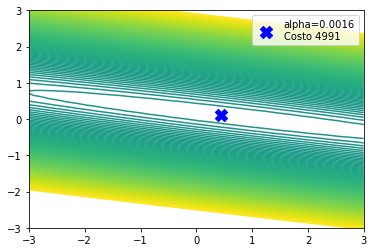

In [10]:
def ModA(a,iteracion):
    m = RegresionLineal(alpha= a, max_iters=10000000, tols=0)
    m.gradientDescent(X, Y)
    cont = plt.figure()
    plt.contour(X1,Y1,Z, levels= np.arange(-100,100,.8), cmap="viridis")
    plt.scatter(m.historia['beta'][iteracion-1][0], m.historia['beta'][iteracion-1][1],c="b",s=150, marker="X", label=str("alpha="+str(a)+"\nCosto "+str(iteracion)))
    plt.legend(loc="best")

interact(ModA, a=(.0003,.003,.0001), iteracion=(1,10000, 10));

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [11]:
%cat data/chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?

Text(0, 0.5, 'Temperature (º F)')

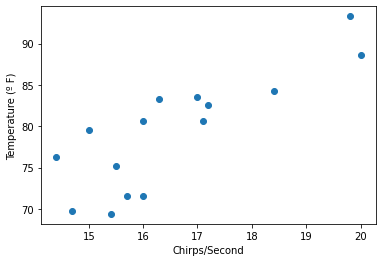

In [12]:
datos = np.loadtxt('data/chirps.txt', dtype="float", delimiter="\t", skiprows=1)
X = datos[:,0]
Y = datos[:,1]
plt.scatter(X,Y)
plt.xlabel('Chirps/Second')
plt.ylabel('Temperature (º F)')

In [13]:
re = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
re.gradientDescent(X, Y)

La función convergió con beta: [22.84871924  3.41033872] en la iteración 384673


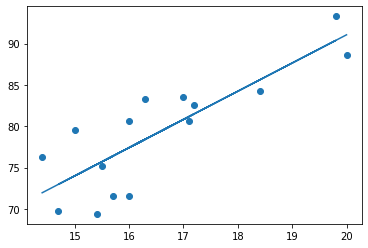

In [14]:
def graR(x,y, R):
    modelo = lambda x,b,m: b + m*x
    i = R.breaking_iteration-1
    Beta = R.historia['beta'][i]
    plt.scatter(x,y, label="Datos")
    plt.plot(x, modelo(x, Beta[0], Beta[1]))
    
graR(X,Y,re)


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [15]:
#Primero creamos un archivo de texto con los valores

with open('data/anscombe.txt', 'x') as f:
    f.write('x,y,x,y,x,y,x,y\n10,8.04,10,9.14,10,7.46,8,6.58\n8,6.95,8,8.14,8,6.77,8,5.76\n13,7.58,13,8.74,13,12.74,8,7.71\n9,8.81,9,8.77,9,7.11,8,8.84\n11,8.33,11,9.26,11,7.81,8,8.47\n14,9.96,14,8.1,14,8.84,8,7.04\n6,7.24,6,6.13,6,6.08,8,5.25\n4,4.26,4,3.1,4,5.39,19,12.5\n12,10.84,12,9.13,12,8.15,8,5.56\n7,4.82,7,7.26,7,6.42,8,7.91\n5,5.68,5,4.74,5,5.73,8,6.89')


In [16]:
%cat data/anscombe.txt

x,y,x,y,x,y,x,y
10,8.04,10,9.14,10,7.46,8,6.58
8,6.95,8,8.14,8,6.77,8,5.76
13,7.58,13,8.74,13,12.74,8,7.71
9,8.81,9,8.77,9,7.11,8,8.84
11,8.33,11,9.26,11,7.81,8,8.47
14,9.96,14,8.1,14,8.84,8,7.04
6,7.24,6,6.13,6,6.08,8,5.25
4,4.26,4,3.1,4,5.39,19,12.5
12,10.84,12,9.13,12,8.15,8,5.56
7,4.82,7,7.26,7,6.42,8,7.91
5,5.68,5,4.74,5,5.73,8,6.89

In [17]:
Anscombe = np.loadtxt("data/anscombe.txt", dtype="float", delimiter=",", skiprows=1)

In [18]:
A1 = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
A1.gradientDescent(Anscombe[:,0], Anscombe[:,1])
A2 = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
A2.gradientDescent(Anscombe[:,2], Anscombe[:,3])
A3 = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
A3.gradientDescent(Anscombe[:,4], Anscombe[:,5])
A4 = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
A4.gradientDescent(Anscombe[:,6], Anscombe[:,7])

La función convergió con beta: [3.00008683 0.50009131] en la iteración 41286
La función convergió con beta: [3.00090503 0.5000004 ] en la iteración 41305
La función convergió con beta: [3.00244952 0.49972777] en la iteración 40652
La función convergió con beta: [3.00172424 0.49990939] en la iteración 42197


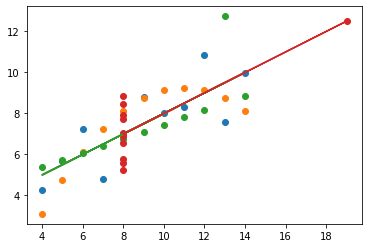

In [19]:
graR(Anscombe[:,0], Anscombe[:,1],A1)
graR(Anscombe[:,2], Anscombe[:,3],A2)
graR(Anscombe[:,4], Anscombe[:,5],A3)
graR(Anscombe[:,6], Anscombe[:,7],A4)

Podemos ver que todas tienen la misma regresion linear, todas convergen a los mismos valores de b_0 y b_1 si los redondeamos a dos decimales.

## Problema 5

Use el archivo `radioactive_decay.dat`

In [20]:
%cat data/radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

Text(0, 0.5, 'N_(remaining)')

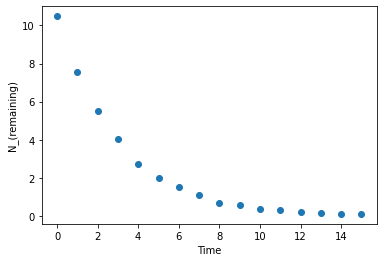

In [21]:
datos = np.loadtxt('data/radioactive_decay.txt', dtype="float", delimiter="\t", skiprows=1)
T = datos[:,0]
N = datos[:,1]
plt.scatter(T,N)
plt.xlabel('Time')
plt.ylabel('N_(remaining)')

Tienen forma de una funcion exponencial exp{-x}

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

Text(0, 0.5, 'N')

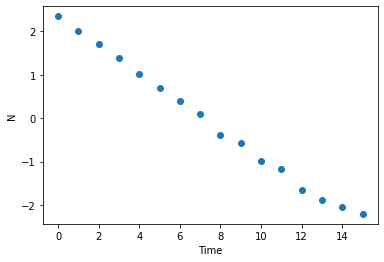

In [22]:
#aplicamos log, ya que es la inversa de una exponencial
N2 = np.log(N)
plt.scatter(T, N2)
plt.xlabel('Time')
plt.ylabel('N')

In [23]:
data = np.append(T, N2)
data = data.reshape(int(len(data)/2),2, order="F")
np.savetxt("transform_radioactive_decay.txt",data, delimiter="\t")
data

array([[ 0.        ,  2.34946868],
       [ 1.        ,  2.02022218],
       [ 2.        ,  1.70292826],
       [ 3.        ,  1.3912819 ],
       [ 4.        ,  1.00795792],
       [ 5.        ,  0.70309751],
       [ 6.        ,  0.40546511],
       [ 7.        ,  0.0861777 ],
       [ 8.        , -0.38566248],
       [ 9.        , -0.56211892],
       [10.        , -0.99425227],
       [11.        , -1.17118298],
       [12.        , -1.66073121],
       [13.        , -1.89711998],
       [14.        , -2.04022083],
       [15.        , -2.20727491]])

In [24]:
%cat transform_radioactive_decay.txt

0.000000000000000000e+00	2.349468678892896012e+00
1.000000000000000000e+00	2.020222182019864920e+00
2.000000000000000000e+00	1.702928255521439338e+00
3.000000000000000000e+00	1.391281902630929546e+00
4.000000000000000000e+00	1.007957920399978891e+00
5.000000000000000000e+00	7.030975114131133852e-01
6.000000000000000000e+00	4.054651081081643849e-01
7.000000000000000000e+00	8.617769624105241222e-02
8.000000000000000000e+00	-3.856624808119846204e-01
9.000000000000000000e+00	-5.621189181535413137e-01
1.000000000000000000e+01	-9.942522733438668991e-01
1.100000000000000000e+01	-1.171182981502945086e+00
1.200000000000000000e+01	-1.660731206821650874e+00
1.300000000000000000e+01	-1.897119984885881294e+00
1.400000000000000000e+01	-2.040220828526554619e+00
1.500000000000000000e+01	-2.207274913189720689e+00


**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

In [25]:
datos = np.loadtxt('transform_radioactive_decay.txt', dtype="float", delimiter="\t")
X2 = datos[:,0]
Y2 = datos[:,1]


La función convergió con beta: [ 2.24479805 -0.31161619] en la iteración 279439


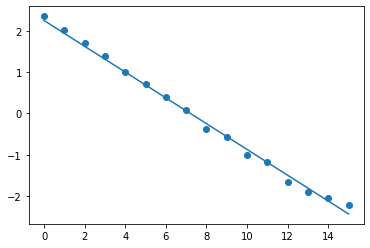

In [26]:
rad = RegresionLineal(alpha=0.00005, max_iters=1000000, tols=.00000001)
rad.gradientDescent(X2,Y2)
graR(X2,Y2,rad)

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son en el espacio sin transformar? Explique.

In [27]:
# Los valores de beta que mejor se ajustan son 
betas=rad.historia['beta'][rad.breaking_iteration-1]
b_0=betas[0]
b_1=betas[1]
print("Beta 0 = ", b_0,",Beta 1 = ",b_1 )

Beta 0 =  2.2447973425665895 ,Beta 1 =  -0.3116161183555904


In [28]:
# en el espacio sin transformar las betas son
radST = RegresionLineal(alpha=0.00005, max_iters=1000000, tols=.00000001)
radST.gradientDescent(T,N)
betas=radST.historia['beta'][radST.breaking_iteration-1]
b0=betas[0]
b1=betas[1]

La función convergió con beta: [ 6.40509483 -0.54430605] en la iteración 355174


In [29]:
print("En el espacio sin transformar los valores de \nbeta que mejor se ajustan son: \nBeta 0 = ", b0,",Beta 1 =",b1)

En el espacio sin transformar los valores de 
beta que mejor se ajustan son: 
Beta 0 =  6.405094122302617 ,Beta 1 = -0.5443059865044021
